In [2]:
from google.colab import drive
drive_root = '/content/drive'
drive.mount(drive_root, force_remount=True)

Mounted at /content/drive


In [3]:
import sys
import os

project_root = os.path.join(drive_root, 'MyDrive/Colab Notebooks/cmpe540/final-project')
source_root = os.path.join(project_root, 'src')
sys.path.append(source_root)
data_folder_path = os.path.join(project_root, 'data')
raw_data_folder_path = os.path.join(data_folder_path, 'raw')
processed_data_folder_path = os.path.join(data_folder_path, 'processed')
training_data_path = os.path.join(processed_data_folder_path, "training_data")

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Load training data
flight_vector_path = os.path.join(training_data_path, "flight_vector.npy")
targets_path = os.path.join(training_data_path, "targets_vector.npy")

flight_vectors = np.load(flight_vector_path, allow_pickle=True)
targets_vector = np.load(targets_path, allow_pickle=True)

In [5]:
# Determine the split index
test_size = 360
train_val_size = len(flight_vectors) - test_size

# Split into training/validation and test sets
train_val_vectors = flight_vectors[:train_val_size]
test_vectors = flight_vectors[train_val_size:]

train_val_targets = targets_vector[:train_val_size]
test_targets = targets_vector[train_val_size:]

from sklearn.model_selection import train_test_split
train_vectors, val_vectors, train_targets, val_targets = train_test_split(
    train_val_vectors,
    train_val_targets,
    test_size=0.2,
    random_state=42,
    shuffle=False
)

# Print shapes to verify
print("Training set shape:", train_vectors.shape)
print("Validation set shape:", val_vectors.shape)
print("Test set shape:", test_vectors.shape)

#Save the data
np.save(os.path.join(training_data_path, "train_vectors.npy"), train_vectors)
np.save(os.path.join(training_data_path, "val_vectors.npy"), val_vectors)
np.save(os.path.join(training_data_path, "test_vectors.npy"), test_vectors)

np.save(os.path.join(training_data_path, "train_targets.npy"), train_targets)
np.save(os.path.join(training_data_path, "val_targets.npy"), val_targets)
np.save(os.path.join(training_data_path,"test_targets.npy"), test_targets)

print("Vectors saved!")

Training set shape: (25216, 36)
Validation set shape: (6305, 36)
Test set shape: (360, 36)
Vectors saved!


In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 1) Load the .npy files
train_vectors = np.load(os.path.join(training_data_path, "train_vectors.npy"), allow_pickle=True)
val_vectors = np.load(os.path.join(training_data_path, "val_vectors.npy"), allow_pickle=True)
test_vectors = np.load(os.path.join(training_data_path, "test_vectors.npy"), allow_pickle=True)

train_targets = np.load(os.path.join(training_data_path, "train_targets.npy"), allow_pickle=True)
val_targets = np.load(os.path.join(training_data_path, "val_targets.npy"), allow_pickle=True)
test_targets = np.load(os.path.join(training_data_path, "test_targets.npy"), allow_pickle=True)

In [7]:
train_vectors = train_vectors.astype(float)
val_vectors   = val_vectors.astype(float)
test_vectors  = test_vectors.astype(float)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create the regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # use all CPU cores for speed
)

# Fit on training data
rf.fit(train_vectors, train_targets)

# Evaluate on validation data
test_predictions = rf.predict(test_vectors)


In [16]:
from sklearn.metrics import root_mean_squared_error

val_mse = root_mean_squared_error(test_targets, test_predictions)

print(f"Test RMSE: {val_mse:.4f}")


Validation RMSE: 45.0342


Directory created at /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 1/25, Learning Rate: 1e-05, Training Loss: 149074.2694, Validation Loss: 71815.0780
Epoch [1/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 149074.2694
Average Validation Loss: 71815.0780


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 2/25, Learning Rate: 1e-05, Training Loss: 148998.0159, Validation Loss: 71757.7855
Epoch [2/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 148998.0159
Average Validation Loss: 71757.7855


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 3/25, Learning Rate: 1e-05, Training Loss: 148850.6292, Validation Loss: 71569.1233
Epoch [3/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 148850.6292
Average Validation Loss: 71569.1233


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 4/25, Learning Rate: 1e-05, Training Loss: 148161.2401, Validation Loss: 70777.9369
Epoch [4/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 148161.2401
Average Validation Loss: 70777.9369


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 5/25, Learning Rate: 1e-05, Training Loss: 146155.3749, Validation Loss: 68897.9531
Epoch [5/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 146155.3749
Average Validation Loss: 68897.9531


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 6/25, Learning Rate: 1e-05, Training Loss: 142138.7775, Validation Loss: 65520.5305
Epoch [6/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 142138.7775
Average Validation Loss: 65520.5305


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 7/25, Learning Rate: 1e-05, Training Loss: 135435.5740, Validation Loss: 60285.0698
Epoch [7/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 135435.5740
Average Validation Loss: 60285.0698


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 8/25, Learning Rate: 1e-05, Training Loss: 125476.9487, Validation Loss: 53051.8027
Epoch [8/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 125476.9487
Average Validation Loss: 53051.8027


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 9/25, Learning Rate: 1e-05, Training Loss: 112013.9660, Validation Loss: 44050.7578
Epoch [9/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 112013.9660
Average Validation Loss: 44050.7578


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 10/25, Learning Rate: 1e-05, Training Loss: 95275.0231, Validation Loss: 34065.4563
Epoch [10/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 95275.0231
Average Validation Loss: 34065.4563


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 11/25, Learning Rate: 1e-05, Training Loss: 76263.2759, Validation Loss: 24543.2622
Epoch [11/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 76263.2759
Average Validation Loss: 24543.2622


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 12/25, Learning Rate: 1e-05, Training Loss: 56855.7583, Validation Loss: 17448.3149
Epoch [12/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 56855.7583
Average Validation Loss: 17448.3149


Best model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/best_model.pth
Epoch 13/25, Learning Rate: 1e-05, Training Loss: 39580.3646, Validation Loss: 14568.5785
Epoch [13/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 39580.3646
Average Validation Loss: 14568.5785


Epoch 14/25, Learning Rate: 1e-05, Training Loss: 26823.1782, Validation Loss: 16247.2724
Epoch [14/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 26823.1782
Average Validation Loss: 16247.2724


Epoch 15/25, Learning Rate: 1e-05, Training Loss: 19516.8771, Validation Loss: 20452.4218
Epoch [15/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 19516.8771
Average Validation Loss: 20452.4218


Epoch 16/25, Learning Rate: 1e-05, Training Loss: 16449.5357, Validation Loss: 24208.8691
Epoch [16/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 16449.5357
Average Validation Loss: 24208.8691


Epoch 17/25, Learning Rate: 1e-05, Training Loss: 15475.3703, Validation Loss: 26292.2930
Epoch [17/25] completed in 0:00:03
Learning Rate: 1e-05
Average Training Loss: 15475.3703
Average Validation Loss: 26292.2930


Epoch 18/25, Learning Rate: 1.0000000000000002e-06, Training Loss: 15203.2847, Validation Loss: 27180.3520
Epoch [18/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-06
Average Training Loss: 15203.2847
Average Validation Loss: 27180.3520


Epoch 19/25, Learning Rate: 1.0000000000000002e-06, Training Loss: 15253.1847, Validation Loss: 27440.5088
Epoch [19/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-06
Average Training Loss: 15253.1847
Average Validation Loss: 27440.5088


Epoch 20/25, Learning Rate: 1.0000000000000002e-06, Training Loss: 15225.4629, Validation Loss: 27677.2582
Epoch [20/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-06
Average Training Loss: 15225.4629
Average Validation Loss: 27677.2582


Epoch 21/25, Learning Rate: 1.0000000000000002e-06, Training Loss: 15201.0655, Validation Loss: 27908.9113
Epoch [21/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-06
Average Training Loss: 15201.0655
Average Validation Loss: 27908.9113


Epoch 22/25, Learning Rate: 1.0000000000000002e-06, Training Loss: 15180.5267, Validation Loss: 28112.6535
Epoch [22/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-06
Average Training Loss: 15180.5267
Average Validation Loss: 28112.6535


Epoch 23/25, Learning Rate: 1.0000000000000002e-07, Training Loss: 15163.6107, Validation Loss: 28292.9065
Epoch [23/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-07
Average Training Loss: 15163.6107
Average Validation Loss: 28292.9065


Epoch 24/25, Learning Rate: 1.0000000000000002e-07, Training Loss: 15152.3193, Validation Loss: 28310.7975
Epoch [24/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-07
Average Training Loss: 15152.3193
Average Validation Loss: 28310.7975


Epoch 25/25, Learning Rate: 1.0000000000000002e-07, Training Loss: 15151.0479, Validation Loss: 28330.4225
Epoch [25/25] completed in 0:00:03
Learning Rate: 1.0000000000000002e-07
Average Training Loss: 15151.0479
Average Validation Loss: 28330.4225
Final trained model saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/final_trained_model.pth
Training/Validation loss plot saved to: /content/drive/MyDrive/Colab Notebooks/cmpe540/final-project/results/20250114_175032/training_validation_loss_plot.png


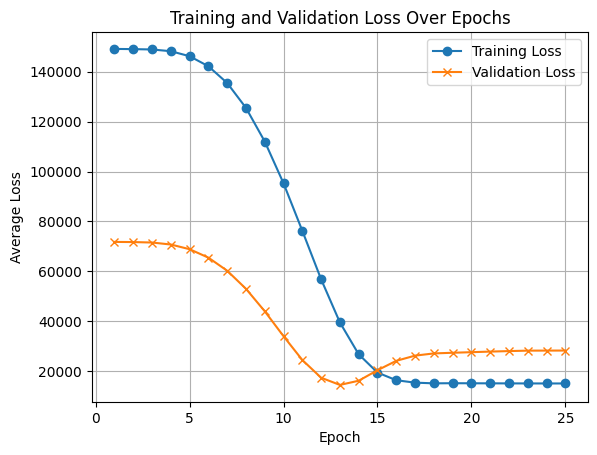

In [ ]:
from datetime import datetime
import os

## Artifact paths (checkpoints, plots, metrics)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_dir = os.path.join(project_root, 'results', timestamp)

# Ensure artifact paths exist
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    print(f'Directory created at {results_dir}')
else:
  print(f'Directory {results_dir} already exists.')

# Train the model
train_model(
    model=model,
    dataloader=train_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=num_epochs,
    device=device,
    results_dir=results_dir,
    val_loader=val_loader,
    scheduler=scheduler
)

In [ ]:
|